<center>
<h1>Simple Py-ART Usage </h1>

</center>


In [4]:
#first we do some imports and check the version of Py-ART for consistency
import pyart
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
print pyart.__version__

1.5.0.dev+65d964f


In [5]:
#you can grab the data here: http://figshare.com/articles/Data_for_AMS_Short_Course_on_Open_Source_Radar_Software/1537461
filename = './data/KAMX_20140417_1056'
radar = pyart.io.read(filename)

Data available by FigShare Here: http://figshare.com/articles/Data_for_AMS_Short_Course_on_Open_Source_Radar_Software/1537461
Download and unpack into the data subdirectory of this repository 

In [6]:
print radar.fields.keys()

['differential_phase', 'cross_correlation_ratio', 'spectrum_width', 'reflectivity', 'differential_reflectivity', 'velocity']


In [7]:
print radar.fields['reflectivity'].keys()

['long_name', 'valid_min', '_FillValue', 'units', 'data', 'valid_max', 'standard_name', 'coordinates']


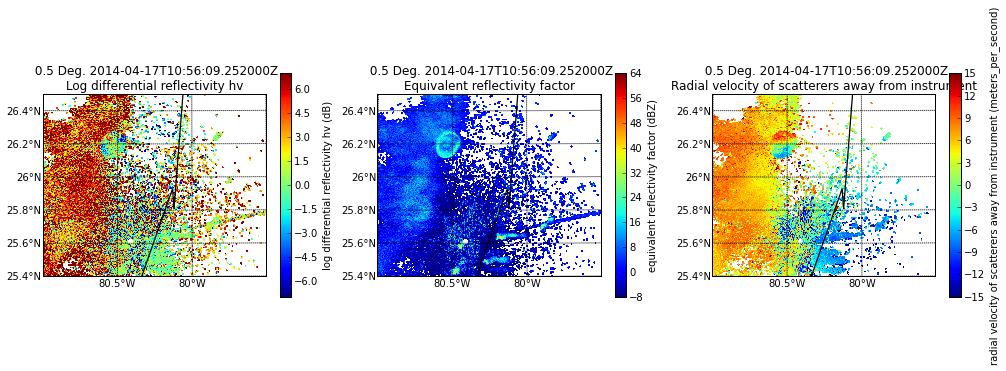

In [8]:
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [17,4])
plt.subplot(1, 3, 1) 
display.plot_ppi_map('differential_reflectivity', max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -7, vmax = 7, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'l')
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -8, vmax = 64, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'l')
plt.subplot(1, 3, 3) 
display.plot_ppi_map('velocity', sweep = 1, max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -15, vmax = 15, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'l')

 

In [9]:
zdr = radar.fields['differential_reflectivity']['data']
smooth_zdr = np.zeros_like(zdr)
for i in range(smooth_zdr.shape[0]):
    smooth_zdr[i,:] = \
            pyart.correct.phase_proc.smooth_and_trim(zdr[i,:], 8)

radar.add_field_like('differential_reflectivity', 
                     'differential_reflectivity_smooth', 
                     smooth_zdr, replace_existing = True)


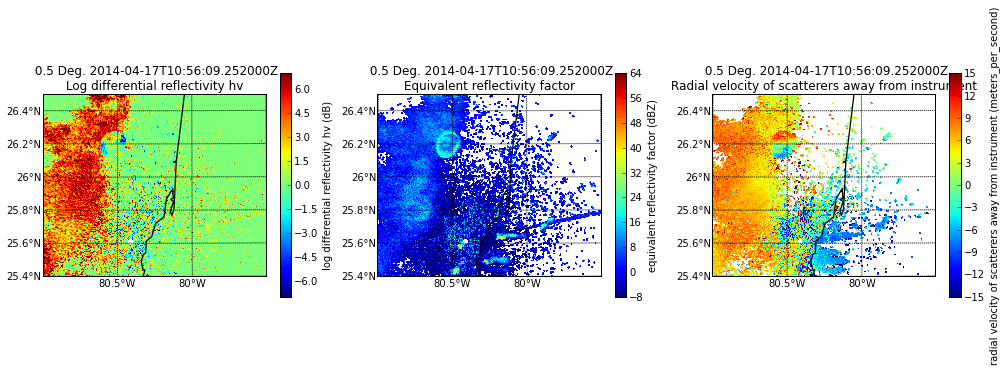

In [10]:
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [17,4])
plt.subplot(1, 3, 1) 
display.plot_ppi_map('differential_reflectivity_smooth', max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -7, vmax = 7, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'i')
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -8, vmax = 64, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'i')
plt.subplot(1, 3, 3) 
display.plot_ppi_map('velocity', sweep = 1, max_lat = 26.5, min_lat =25.4, min_lon = -81., max_lon = -79.5,
                     vmin = -15, vmax = 15, lat_lines = np.arange(20,28,.2), lon_lines = np.arange(-82, -79, .5),
                     resolution = 'i')

 

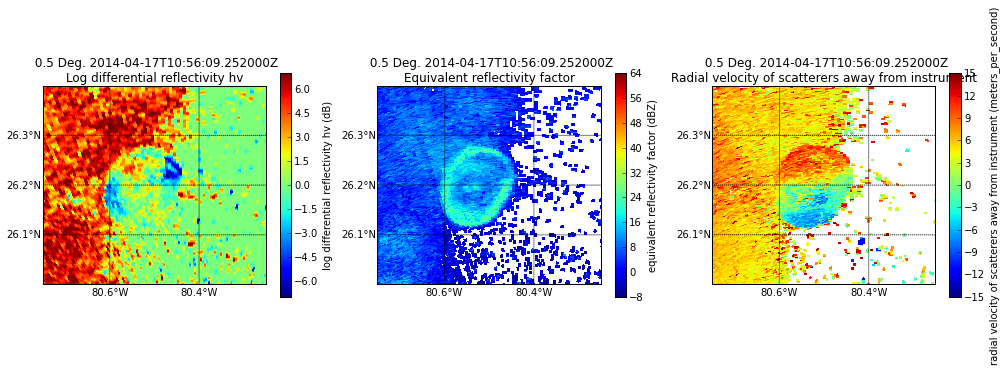

In [11]:
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [17,4])
plt.subplot(1, 3, 1) 
display.plot_ppi_map('differential_reflectivity_smooth', max_lat = 26.4, min_lat =26, min_lon = -80.75, max_lon = -80.25,
                     vmin = -7, vmax = 7, lat_lines = np.arange(20,28,.1), lon_lines = np.arange(-82, -79, .2),
                     resolution = 'l')
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 26.4, min_lat =26, min_lon = -80.75, max_lon = -80.25,
                     vmin = -8, vmax = 64, lat_lines = np.arange(20,28,.1), lon_lines = np.arange(-82, -79, .2),
                     resolution = 'l')
plt.subplot(1, 3, 3) 
display.plot_ppi_map('velocity', sweep = 1, max_lat = 26.4, min_lat =26, min_lon = -80.75, max_lon = -80.25,
                     vmin = -15, vmax = 15, lat_lines = np.arange(20,28,.1), lon_lines = np.arange(-82, -79, .2),
                     resolution = 'l')

 

Take a read of the BAMS article by Zirnic and Ryzhkov: http://journals.ametsoc.org/doi/pdf/10.1175/1520-0477%281999%29080%3C0389%3APFWSR%3E2.0.CO%3B2

Should also be a $\delta_{dp}$ signal on top of $\phi_{dp}$.. Lets take a look 

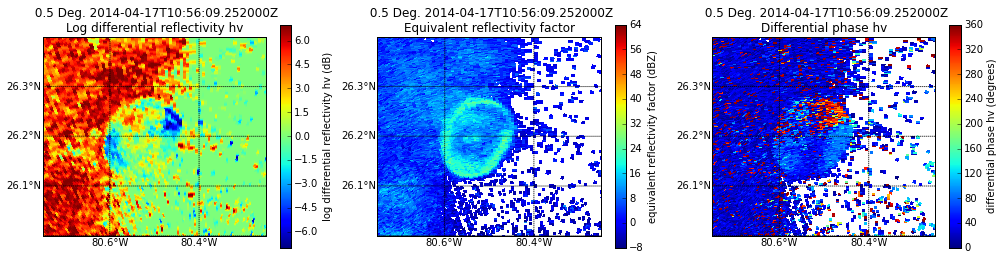

In [12]:
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize = [17,4])
plt.subplot(1, 3, 1) 
display.plot_ppi_map('differential_reflectivity_smooth', max_lat = 26.4, min_lat =26, min_lon = -80.75, max_lon = -80.25,
                     vmin = -7, vmax = 7, lat_lines = np.arange(20,28,.1), lon_lines = np.arange(-82, -79, .2),
                     resolution = 'l')
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 26.4, min_lat =26, min_lon = -80.75, max_lon = -80.25,
                     vmin = -8, vmax = 64, lat_lines = np.arange(20,28,.1), lon_lines = np.arange(-82, -79, .2),
                     resolution = 'l')
plt.subplot(1, 3, 3) 
display.plot_ppi_map('differential_phase', sweep = 0, max_lat = 26.4, min_lat =26, min_lon = -80.75, max_lon = -80.25,
                     vmin = 0, vmax = 360, lat_lines = np.arange(20,28,.1), lon_lines = np.arange(-82, -79, .2),
                     resolution = 'l')

 

In [13]:
pyart.io.write_cfradial('./data/foo.nc', radar)